In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# loading the dataset into pandas dataframe
df = pd.read_csv("onlinefrauddetectionsystem.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,PAYEMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0,0,0
1,1,PAYEMENT,1864.28,C1666544295,21249,19384.72,M2044283225,0,0,0,0
2,2,TRANSFER,181.00,C1305486145,181,0.00,C553264065,0,0,1,0
3,3,CASH_OUT,181.00,C840083671,181,0.00,C38997010,21182,0,1,0
4,4,PAYEMENT,11668.14,C2048537720,41554,29885.86,M1230701703,0,0,0,0


In [15]:
# Retain the 6 features and the target variable
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount          5 non-null      float64
 1   oldbalanceOrg   5 non-null      int64  
 2   newbalanceOrig  5 non-null      float64
 3   oldbalanceDest  5 non-null      int64  
 4   newbalanceDest  5 non-null      int64  
 5   isFraud         5 non-null      int64  
 6   isFlaggedFraud  5 non-null      int64  
dtypes: float64(2), int64(5)
memory usage: 408.0 bytes


In [17]:
df.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
df['isFraud'].value_counts()

isFraud
0    3
1    2
Name: count, dtype: int64

In [19]:
# Load the features to a variable X
# X is created by simply dropping the diagnosis column and retaining all others
X = df.drop('isFraud',axis=1)


#Load the target variable to y
y = df['isFraud']

In [20]:
# Do the train/test split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [21]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [22]:
# Prediction with the test set
y_predict = classifier.predict(X_test)

In [23]:
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
2,1,0
1,0,0


In [24]:
# Compute Model Accuracy.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.5


In [25]:
# Model accuracy on training set.

# Get the predictions from the model for the training set.

y_train_pred = classifier.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

1.0


In [26]:
# Getting probability predictions from the model.
y_test_proba = classifier.predict_proba(X_test)

print(y_test_proba.shape)

(2, 2)


In [27]:
y_test_proba[0:5,:]

array([[0.5087715, 0.4912285],
       [0.9961963, 0.0038037]])

In [28]:
import numpy as np

# Given array in scientific notation
array_in_scientific = y_test_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)


[['0.5087714989976184' '0.4912285010023816']
 ['0.9961962963963821' '0.0038037036036179']]


In [29]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)


['0.4912285010023816' '0.0038037036036179']


In [30]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

Results.head(5)

,Actual,Predictions,Prob(Class = 1)
2,1,0,0.4912285010023816
1,0,0,0.0038037036036179


In [31]:
#Generate the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1 0]
 [1 0]]


Text(69.0, 0.5, 'True Label')

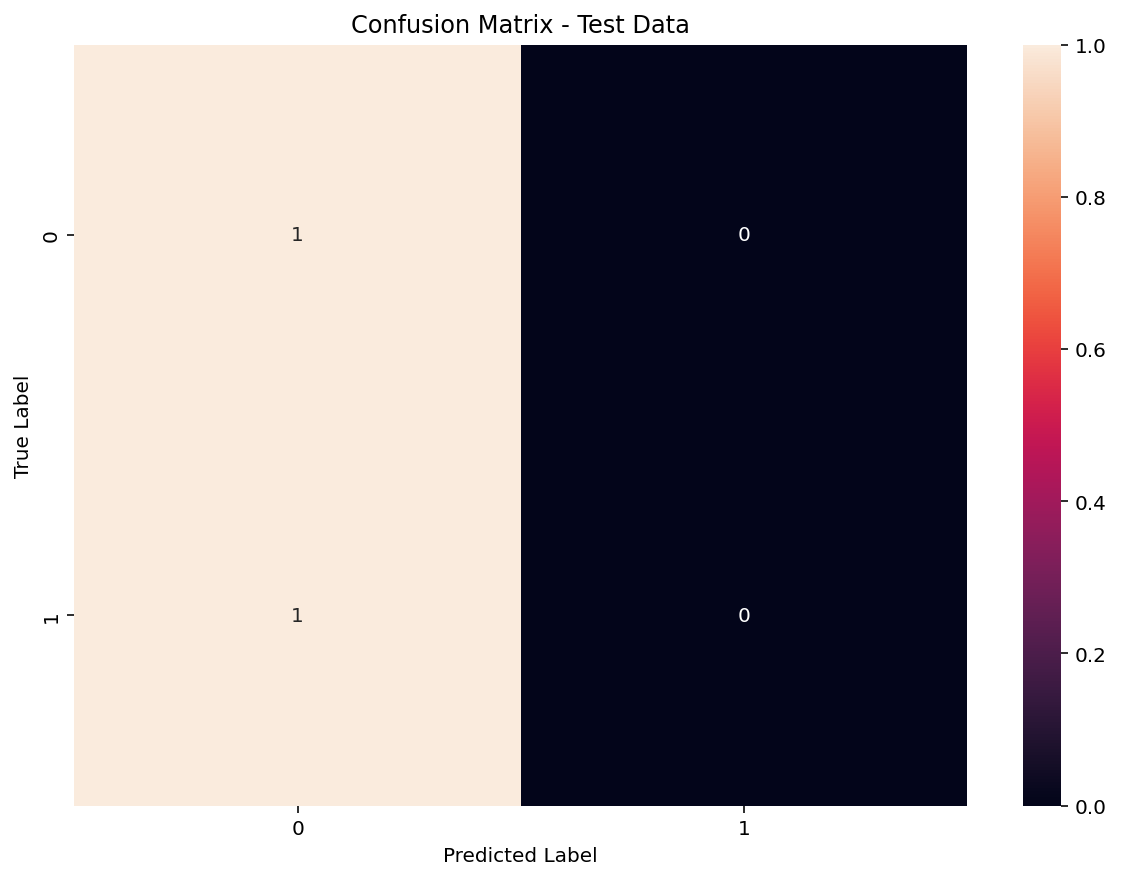

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

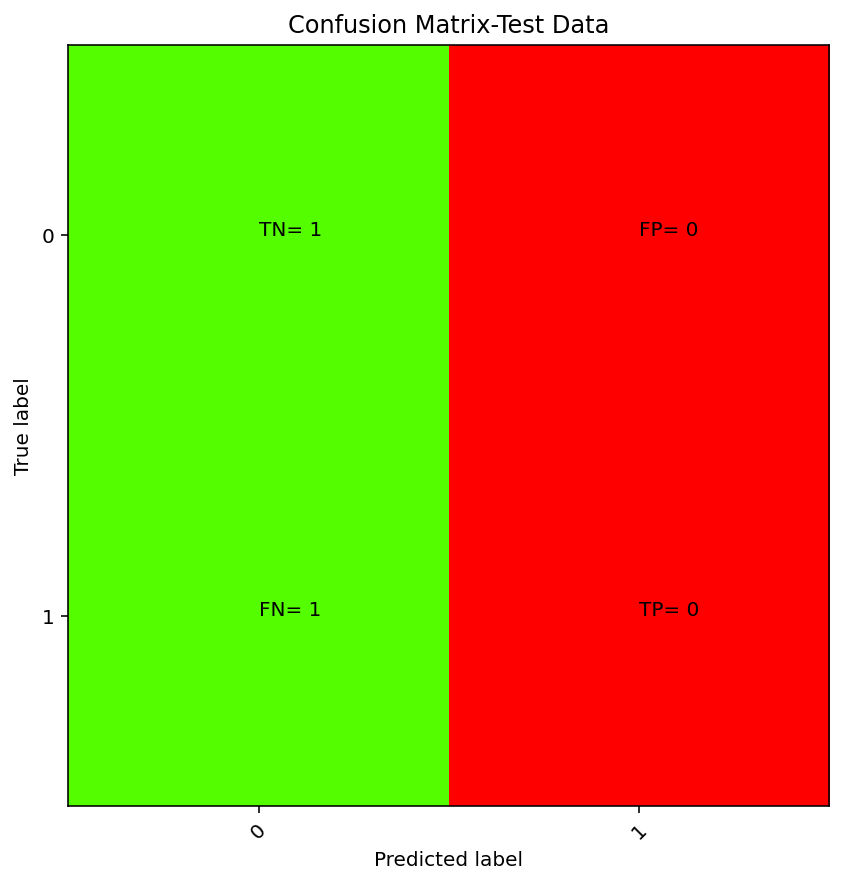

In [33]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [34]:
#Calculate common error metrics for a 2-class classifier

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Calculate metrics values individually

# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [36]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.0


In [37]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= nan


/tmp/ipykernel_1013/4264062400.py:1: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)


In [38]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  1.0


In [39]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.5
